 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Inheritance
- Polymorphism
- Abstraction


## ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [7]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [5]:
#access mods give differing levels of protections.  Public, private(__) and protected (_)
# but in general wrapping your data and methods inside of a class has some level of protection

class MyVideo():

    def __init__(self, title, description, length, preview, genre, cast, view_size, rating):
        self.title = title
        self.desc = description
        self.len = length
        self.prev = preview
        self.gen = genre
        self.cast = cast
        self.vs = view_size
        self.rating = rating

    def view_cast(self):
        print(f'The description for {self.title}: {self.cast}')

    def view_desc(self):
        print(f'The description for {self.title}: {self.desc}')

    def view_stats(self):
        print(f'Here are the stats for{self.title}: \n {self.genre} \n {self.rating} \n {self.len}')

    def watch_preview(self):
        print(F'Here is the preview for {self.title}')
        # play preview video

    def __repr__(self):
        return f'Deez nuts'



In [6]:

alex_video = MyVideo('Willow', 'group of crazy characters needs to save the baby from the evil queen', '2.5 hours',                    False, 'Fantasy', ['Guy1','Gal1'], 'Large', 3.9)
alex_video.view_stats()



Here are the stats forWillow: 
 3.9 
 3.9 
 2.5 hours


In [24]:
class Video():

    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image

    def play(self):
        print(f'Now playing {self.title}')
        display(Image(self.link))

    def __len__(self):
        return self.length

    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long"

    

## INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [25]:
# parent classes aka base classes that child classes aka derived classes can inherit

class Episode(Video):
    
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']

        

    


## POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [48]:
class Series():
    
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
        
    def get_info(self, query=""):
        data = None #in case we can't find the show 
        
        while not data:
            if not query:
                query = input('What is the name of the series? ')
                
            response = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
            if response.status_code == 200:
                data = response.json()
                
            else:
                print("Series Error: Series does not exist, check your series name", response.status_code) #should come back 404
            
        #use data to set our series attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = data['genres']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
        self.summary = data['summary']
        
        episodes = None 
        response = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if response.status_code == 200:
            episodes = response.json()
        else:
            print(f"Episode Error: Episodes do not exist on this series, check your series name", response.status_code)


        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes] #this is passing the entire episode dictionary to Episode() class
        print(f"{self.title} has {len(self.episodes)} episodes!")
        
        
    def watch(self):
        
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job! y/n ")
                if watching.lower().strip() not in {'yes', 'y', 'yeah', 'oh yeah', 'ye'}:
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
            
    def __len__(self):
        return len(self.episodes)
    
    
    def __repr__(self):
        return f"Title: {self.title}"

In [21]:
my_show = Series()

In [26]:
my_show.get_info()

What is the name of the series?  big brother


Big Brother has 874 episodes!


Now playing Episode 1


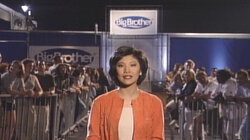

Now playing Episode 2


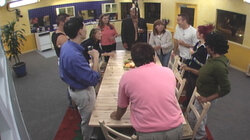

Now playing Episode 3


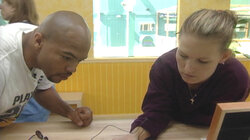

Are you still watching? also get a job! y/n  n


In [27]:
my_show.watch()

In [49]:
class User():

    #access modifiers give different levels of security to attributes and methods
    __id_counter = 1 # private class attribute

    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.__id_counter
        User.__id_counter += 1
        self.watch_list = []

    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """

        return formatted_user

    def __repr__(self):
        return f'<User {self.id} | {self.username}>'

    def check_pass(self, password_guess):
        return self.password == password_guess[::-2]
        

## ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>

In [50]:
class Theater():
    
    def __init__(self):
        self.users = set()
        self.current_user = None 
        
        
    #add a user
    def add_user(self):
        username = input("Please enter a username: ")
        
        username_set = set()
                        
        if username in {u.username for u in self.users}: #u is a variable represents each user object
            print("User with that name already exists. Please try again!", 409) #409 error, conflict in request 
            
        else:
            password = input("Please enter a password: ")
            user = User(username, password) #user object
            self.users.add(user) #adding that object to the users list
            print(f"{user} has been created!!!")
            
        self.login_user()
        
        
        
    #login our users
    def login_user(self):
        print("Log into your account")
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_pass(password):
                self.current_user = user
                print(f"{user} is logged in!")
                break
            
        else:
            print("Username and/or password is incorrect", 409) #409 error, conflict in request 
            
    #logout our users
    def logout(self):
        self.current_user = None
        print("You have successfuly logged out!")
        
        
    #update user attributes
    def update_user(self):
        
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep current username ").lower()
            if new_user != 'skip':
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to keep current password ").lower()
            if new_pw != 'skip':
                self.current_user.password = new_pw

            print(f"{self.current_user.username}'s info has been updated!")
            
        else:
            print("Please login to update user info")
            self.login_user()
            
            
            
    #=========== WATCHLIST FUNCTIONALITY ==============
    
    #add to our watchlist
    def add_to_watchlist(self, query = ""):
        
        if self.current_user:
            show = Series()
            show.get_info(query)
            
            self.current_user.watch_list.append(show)
            
            print(f"{show.title} has been added to your watchlist")
            
        else:
            print("You must be logged in in order to add to your watchlist")
            self.login_user()
            
            
    #view your watchlist
    def view_watchlist(self):
        
        if self.current_user:
            print(f"Your watchlist has {len(self.current_user.watch_list)} shows in it")
            for series in self.current_user.watch_list:
                print(f"\n{series} | Episodes: {len(series.episodes)}")
                print(f"\nSummary: {series.summary}")
                display(Image(url = series.episodes[0].link))
        else:
            print("You must be logged in in order to delete from your watchlist")
            self.login_user()    
            
    #delete from your watchlist
    def delete(self):
        
        if self.current_user:
            print("Your current watchlist: ")
            self.view_watchlist()

            response = input("What would you like to remove from your watchlist? ")

            for series in self.current_user.watch_list:
                if series.title.lower() == response.lower():
                    self.current_user.watch_list.remove(series)
                    print(f"{response.title()} has been removed from your watchlist")
                    break

            else:
                print("That title is not in your watch list", 404) #404 not found 
            
        else:
            print("You must be logged in in order to delete from your watchlist")
            self.login_user()
            
        self.view_watchlist()
        
        
    #choose from our watchlist
    def choose_from_watchlist(self):
        
        if self.current_user:
            
            self.view_watchlist()
            watch = input("What would you like to watch? ").strip()
            for series in self.current_user.watch_list:
                if series.title.lower() == watch.lower():
                    series.watch()
                    
            else:
                response = input(f"{watch} is not curently in your watchlist...would you like to add it? y/n")
                if response in {'yes', 'y', 'yeah', 'ye'}:
                    self.add_to_watchlist(watch)
                    
                    print(".........")
                    sleep(2)
                    print(".........")
                    self.current_user.watch_list[-1].watch()
        
        else:
            print("You must be logged in in order to delete from your watchlist")
            self.login_user()
            
            
            
            
     #=========== RUN FUNCTIONALITY ==============
    
    
    def run(self):
        
        """
        Method on the Theater Class
        run() allows user to choose from a series of options to create users
        and search for shows and create watchlist 
        """
        
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
            
        else:
            self.add_user()
            
            
        print("""            
            What would you like to do?            
            Add - add a new user
            Login - login to your profile
            Update - update user info
            Logout - logout of your profile            
            Search - Search for shows
            Watch - Pick something from your watchlist            
            View - view watch list
            Delete - delete from watch list
            Quit - close the application           

            """)
        
        while True: 
            response = input("What would you like to do? (add, login, update, logout, search, watch, view, delete, quit)").lower().strip()
            
            
            if response == 'add':
                self.add_user()
                
            elif response == 'login':
                self.login_user()
            elif response == 'update':
                self.update_user()
            elif response == 'logout':
                self.logout()
            elif response == 'search':
                self.add_to_watchlist()
            elif response == 'watch':
                self.choose_from_watchlist()
            elif response == 'view':
                self.view_watchlist()
            elif response == 'delete':
                self.delete()
            elif response == 'quit':
                print(f"Thanks for watching! {self.current_user} We love you! Come back soon :) ")
                break
            else:
                print("Invalid Input: please try again!")

In [51]:
codeflix = Theater()

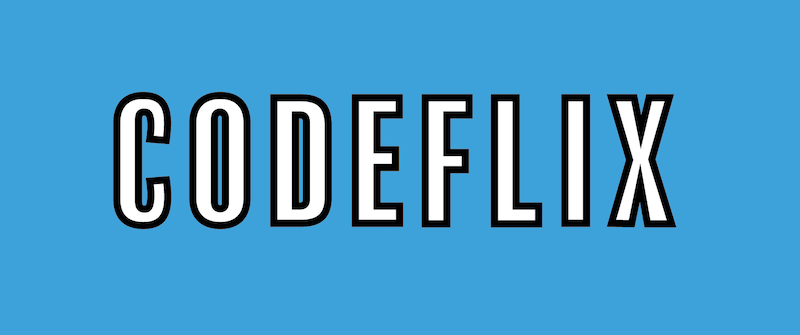

Please enter a username:  Matt LaGreca
Please enter a password:  ITG4ever



        1 - Matt Lagreca
        pw: rv4T
         has been created!!!
Log into your account


What is your username?  Matt LaGreca
What is your password?  rv4T


Username and/or password is incorrect 409
            
            What would you like to do?            
            Add - add a new user
            Login - login to your profile
            Update - update user info
            Logout - logout of your profile            
            Search - Search for shows
            Watch - Pick something from your watchlist            
            View - view watch list
            Delete - delete from watch list
            Quit - close the application           

            


What would you like to do? (add, login, update, logout, search, watch, view, delete, quit) login


Log into your account


What is your username?  Matt LaGreca
What is your password?  ITG4ever



        1 - Matt Lagreca
        pw: rv4T
         is logged in!


What would you like to do? (add, login, update, logout, search, watch, view, delete, quit) update



        1 - Matt Lagreca
        pw: rv4T
        


Please enter the updated username or enter skip to keep current username  Matt LaGreca
Please enter the updated password or enter skip to keep current password  ITG4ever


matt lagreca's info has been updated!


What would you like to do? (add, login, update, logout, search, watch, view, delete, quit) login


Log into your account


What is your username?  Matt LaGreca
What is your password?  ITG4ever


Username and/or password is incorrect 409


What would you like to do? (add, login, update, logout, search, watch, view, delete, quit) quit


Thanks for watching! 
        1 - Matt Lagreca
        pw: itg4ever
         We love you! Come back soon :) 


In [52]:
codeflix.run()

## Exercise 1

<p>Describe in your own words the following concepts and give an analogy tying to a real-world concept.

#### Difference between a Class and an Object

In [ ]:
The difference between a Class and an Object is that a Class is a category of things and 
an Object is an instantiation of a Class.  For example, Grocery Store is a class and a WalMart
would be an object of the Grocery Store Class


#### Encapsulation

In [ ]:
Encapsulation is hiding the internal data of an object from the user in varying degrees.
So for example, as I person I encapsulate my social security number so as to not be a victim of 
identity theft, but I have access to that information at all times and am able to differentiate when
I should and shouldn't be giving that information out.

#### Inheritance

In [ ]:
Inheritance is taking attributes and methods from a parent class.  For example: the Animal Class could be 
inherited to a sub class, like Dog, and would get certain attributes by default (like # of legs or speaking)

                                                                            

#### Polymorphism

In [ ]:
Using the example above, polymorphism would be taking the speak functionality and changing what it does.
For example, my dog goes bark and my cat goes "gurloog"; they are both animals but they make very different
sounds with their mouths.

#### Abstraction

In [ ]:
Abstracting is kind of like encapsulation, but instead of hiding the internal data
it's the actual information that the user doesn't need to see but is still able to interface
with the application just fine.  For example, when logging into a website, the user doesn't need
to see the checks in the background happening in order for them to get logged in, they just need
to make sure that they provide valid information in order to log in.

##  Exercise 2 (Optional):
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads. Make sure you either write out your thoughts in the below cell  or comment where you added code to the above Classes.